# Dados: importação e tratamento

## Importação de bibliotecas e funções

### Bibliotecas

In [85]:
import numpy as np
import pandas as pd
import json

### Funções

In [86]:
# função que aplica um loop que identifica os valores únicos de todas as colunas do dataframe:

def valores_unicos_colunas(df):
    for col in df.columns:
        print(f'Coluna: {col}')
        print(df[col].unique())
        print('-' * 30)

### Importando os dados

In [87]:
df_churn = pd.read_json('./data/Telco-Customer-Churn.json')
df_churn.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


Parece ser um arquivo .json simples de ser normalizado, sem muitos níveis internos.

In [88]:
pd.json_normalize(df_churn['customer'])

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3
...,...,...,...,...,...
7262,Female,0,No,No,13
7263,Male,0,Yes,No,22
7264,Male,0,No,No,2
7265,Male,0,Yes,Yes,67


In [89]:
pd.json_normalize(df_churn['phone'])

,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No
...,...,...
7262,Yes,No
7263,Yes,Yes
7264,Yes,No
7265,Yes,No


In [90]:
with open('./data/Telco-Customer-Churn.json') as f:
    json = json.load(f)

In [91]:
df_churn = pd.json_normalize(json)
df_churn.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [92]:
df_churn.shape

(7267, 21)

### Inspeção primária: nomes das colunas, estruturas dos dados, descrições sumárias e valores únicos

In [93]:
df_churn.columns

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

Temos acesso a um dicionário dos dados que nos permite compreender a natureza dos dados:

#### Dicionário de dados

* `customerID`: número de identificação único de cada cliente
* `Churn`: se o cliente deixou ou não a empresa 
* `gender`: gênero (masculino e feminino) 
* `SeniorCitizen`: informação sobre um cliente ter ou não idade igual ou maior que 65 anos 
* `Partner`:  se o cliente possui ou não um parceiro ou parceira
* `Dependents`: se o cliente possui ou não dependentes
* `tenure`:  meses de contrato do cliente
* `PhoneService`: assinatura de serviço telefônico 
* `MultipleLines`: assisnatura de mais de uma linha de telefone 
* `InternetService`: assinatura de um provedor internet 
* `OnlineSecurity`: assinatura adicional de segurança online 
* `OnlineBackup`: assinatura adicional de backup online 
* `DeviceProtection`: assinatura adicional de proteção no dispositivo 
* `TechSupport`: assinatura adicional de suporte técnico, menos tempo de espera
* `StreamingTV`: assinatura de TV a cabo 
* `StreamingMovies`: assinatura de streaming de filmes 
* `Contract`: tipo de contrato
* `PaperlessBilling`: se o cliente prefere receber online a fatura
* `PaymentMethod`: forma de pagamento
* `Charges.Monthly`: total de todos os serviços do cliente por mês
* `Charges.Total`: total gasto pelo cliente

In [94]:
df_churn.describe()

,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly
count,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098
std,0.369074,24.571773,30.129572
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.425000
50%,0.000000,29.000000,70.300000
75%,0.000000,55.000000,89.875000
max,1.000000,72.000000,118.750000


In [95]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [96]:
df_churn.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


Idenfiticando valores únicos:

In [97]:
valores_unicos_colunas(df_churn)

Coluna: customerID
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
------------------------------
Coluna: Churn
['No' 'Yes' '']
------------------------------
Coluna: customer.gender
['Female' 'Male']
------------------------------
Coluna: customer.SeniorCitizen
[0 1]
------------------------------
Coluna: customer.Partner
['Yes' 'No']
------------------------------
Coluna: customer.Dependents
['Yes' 'No']
------------------------------
Coluna: customer.tenure
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
------------------------------
Coluna: phone.PhoneService
['Yes' 'No']
------------------------------
Coluna: phone.MultipleLines
['No' 'Yes' 'No phone service']
------------------------------
Coluna: internet.InternetService
['DSL' 'Fiber optic' 'No']
---------------------

Algumas observações iniciais:
- A maioria das colunas corresponde ao formato esperado de dado pelo dicionário **a princípio**;
- A coluna 'account.Charges.Total' deveria estar no tipo float, mas está como objeto;
- Há valores faltantes na coluna 'Churn';
- Não há consistência nas variáveis binárias, se deveriam ser 0 e 1 ou 'não' e 'sim'.


Vamos aplicar as correções necessárias

### Limpeza e tratamento dos dados

In [98]:
# df_churn['account.Charges.Total'].astype(float)
# comentando para suprimir a mensagem de erro

Rodando da primeira vez, tem um output
> ValueError: could not convert string to float: ''

ou seja, há valores nulos

In [99]:
df_churn.query('`account.Charges.Total` == " "')

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,


De cara, podemos perceber que esses clientes possuem a coluna 'tenure' zerada, ou seja, possuem 0 meses de tempo de assinatura, logo, ainda não há uma cobrança somada total. Vamos analisar mais a fundo essa relação examinando melhor as variáveis envolvidas.

In [100]:
df_churn.query('`customer.tenure` == 0 ')[['Churn', 'customer.tenure', 'account.Contract', 'account.Charges.Monthly', 'account.Charges.Total']]

,Churn,customer.tenure,account.Contract,account.Charges.Monthly,account.Charges.Total
975,No,0,Two year,56.05,
1775,No,0,Two year,20.00,
1955,No,0,Two year,61.90,
2075,No,0,One year,19.70,
2232,No,0,Two year,20.25,
2308,No,0,Two year,25.35,
2930,No,0,Two year,73.35,
3134,No,0,Two year,25.75,
3203,No,0,Two year,52.55,
4169,No,0,Two year,80.85,


In [101]:
df_churn.query('`customer.tenure` == 1')[['Churn', 'customer.tenure', 'account.Contract', 'account.Charges.Monthly', 'account.Charges.Total']]

,Churn,customer.tenure,account.Contract,account.Charges.Monthly,account.Charges.Total
17,No,1,Month-to-month,72.10,72.1
19,Yes,1,Month-to-month,25.10,25.1
25,Yes,1,Month-to-month,30.50,30.5
49,No,1,Month-to-month,44.30,44.3
64,Yes,1,Month-to-month,19.85,19.85
...,...,...,...,...,...
7201,Yes,1,Month-to-month,25.05,25.05
7229,Yes,1,Month-to-month,75.30,75.3
7244,No,1,Month-to-month,20.05,20.05
7257,No,1,Month-to-month,18.90,18.9


Uma hipótese que me surgiu inspecionando o dataframe é que apenas os tenure == 0 teriam os tipos de contrato de um ou dois anos, mas uma outra query indica que esse não é o caso:

In [102]:
df_churn.query('`account.Contract` == "One year" ')[['Churn', 'customer.tenure', 'account.Contract', 'account.Charges.Monthly', 'account.Charges.Total']]

,Churn,customer.tenure,account.Contract,account.Charges.Monthly,account.Charges.Total
0,No,9,One year,65.60,593.3
16,No,34,One year,61.25,1993.2
18,Yes,45,One year,62.70,2791.5
20,No,50,One year,25.20,1306.3
26,No,55,One year,103.70,5656.75
...,...,...,...,...,...
7249,No,63,One year,68.80,4111.35
7254,No,53,One year,94.00,4871.45
7258,No,47,One year,84.95,4018.05
7259,No,7,One year,94.05,633.45


Após examinar a natureza de alguns contratos de clientes com poucos meses de tenure, me parece que as modalidades 'month-to-month' são preferencialmente escolhidas por clientes novos. Pode ser uma relação a ser estudada mais a fundo futuramente.

Voltando ao tópico em questão, examinando a relação entre as colunas, fica claro que independente do tipo de contrato, o cálculo de charges.total é sempre aplicado multiplicando a coluna de charges.monthly pelo tempo de contratação em meses (o valor total geralmente é um pouco menor do que a multiplicação exata, provavelmente devido a descontos).

Não é interessante remover esses dados simplesmente por não terem concluído o mês de teste, porque, embora nenhum destes ainda tenha cancelado o serviço (churn = No), poderia sim haver casos de cancelamento nos primeiros dias ou semanas. Para lidar com esses dados, vamos considerar que a maioria das operadoras de telefonia não oferece um período de testes devido à infraestrutura necessária e custos de instalação. Para efeitos práticos, como em todos os modelos de contrato o total é sempre calculado o total com base na cobrança mês a mês, para esses clientes vamos considerar que o primeiro mês já foi pago, e então copiar o valor da coluna account.Charges.Monthly

In [103]:
df_churn.loc[df_churn[df_churn['account.Charges.Total'] == " "].index, 'account.Charges.Total'] = df_churn.loc[df_churn[df_churn['account.Charges.Total'] == " "].index, 'account.Charges.Monthly']

In [104]:
df_churn.query('`customer.tenure` == 0 ')[['Churn', 'customer.tenure', 'account.Contract', 'account.Charges.Monthly', 'account.Charges.Total']]

,Churn,customer.tenure,account.Contract,account.Charges.Monthly,account.Charges.Total
975,No,0,Two year,56.05,56.05
1775,No,0,Two year,20.00,20.0
1955,No,0,Two year,61.90,61.9
2075,No,0,One year,19.70,19.7
2232,No,0,Two year,20.25,20.25
2308,No,0,Two year,25.35,25.35
2930,No,0,Two year,73.35,73.35
3134,No,0,Two year,25.75,25.75
3203,No,0,Two year,52.55,52.55
4169,No,0,Two year,80.85,80.85


Conferindo se ainda há valores em branco:

In [105]:
df_churn.query('`account.Charges.Total` == " "')

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total


Corrigindo o tipo:

In [106]:
df_churn['account.Charges.Total'] = df_churn['account.Charges.Total'].astype(float)

In [107]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

Se voltarmos à nossa lista de observações:

- A maioria das colunas corresponde ao formato esperado de dado pelo dicionário **a princípio**;

~~- A coluna 'account.Charges.Total' deveria estar no tipo float, mas está como objeto;~~

- Há valores faltantes na coluna 'Churn';
- Não há consistência nas variáveis binárias, se deveriam ser 0 e 1 ou 'não' e 'sim'.


Dando continuidade às outras correções:

In [108]:
df_churn['Churn'].unique()

array(['No', 'Yes', ''], dtype=object)

In [109]:
df_churn.query('Churn == ""')

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
30,0047-ZHDTW,,Female,0,No,No,11,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.30
75,0120-YZLQA,,Male,0,No,No,71,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.10
96,0154-QYHJU,,Male,0,No,No,29,Yes,No,DSL,...,Yes,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.20
98,0162-RZGMZ,,Female,1,No,No,5,Yes,No,DSL,...,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85
175,0274-VVQOQ,,Male,1,Yes,No,65,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,9840-GSRFX,,Female,0,No,No,14,Yes,Yes,DSL,...,Yes,No,No,No,No,One year,Yes,Mailed check,54.25,773.20
7180,9872-RZQQB,,Female,0,Yes,No,49,No,No phone service,DSL,...,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75
7211,9920-GNDMB,,Male,0,No,No,9,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,76.25,684.85
7239,9955-RVWSC,,Female,0,Yes,Yes,67,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.25,1372.90


Nesse caso, temos 224 colunas em que não há a informação sobre churn, não sabemos se o cliente em questão teve churn ou não. Como não há uma forma correta de estimar justamente a nossa variável de interesse, essas colunas devem ser removidas na nossa base de dados. Uma prática comum nesse ponto é criar um novo dataframe sem as colunas vazias, pois pode ser interessante aplicar outro tratamento a esses dados faltantes.

In [110]:
df_churn_sem_vazio = df_churn[df_churn['Churn'] != ''].copy()
df_churn_sem_vazio.reset_index(drop = True, inplace = True)
df_churn_sem_vazio.shape

(7043, 21)

In [111]:
df_churn_sem_vazio.query('Churn == ""')

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total


- A maioria das colunas corresponde ao formato esperado de dado pelo dicionário **a princípio**;

~~- A coluna 'account.Charges.Total' deveria estar no tipo float, mas está como objeto;~~

~~- Há valores faltantes na coluna 'Churn';~~

- Não há consistência nas variáveis binárias, se deveriam ser 0 e 1 ou 'não' e 'sim'.


Porém, é importante também checar se há mais algum valor vazio:

In [112]:
df_churn_sem_vazio.isna().sum()

customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64

Não há mais dados vazios, pois tratamos os casos da coluna account.Charges.Monthly anteriormente. Vamos lidar com as variáveis binárias:

In [113]:
colunas_binarias = ['Churn', 'customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'phone.PhoneService', 'account.PaperlessBilling']

In [114]:
df_churn_sem_vazio[colunas_binarias]

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,phone.PhoneService,account.PaperlessBilling
0,No,Female,0,Yes,Yes,Yes,Yes
1,No,Male,0,No,No,Yes,No
2,Yes,Male,0,No,No,Yes,Yes
3,Yes,Male,1,Yes,No,Yes,Yes
4,Yes,Female,1,Yes,No,Yes,Yes
...,...,...,...,...,...,...,...
7038,No,Female,0,No,No,Yes,No
7039,Yes,Male,0,Yes,No,Yes,Yes
7040,No,Male,0,No,No,Yes,Yes
7041,No,Male,0,Yes,Yes,Yes,No


In [115]:
valores_unicos_colunas(df_churn_sem_vazio[colunas_binarias])

Coluna: Churn
['No' 'Yes']
------------------------------
Coluna: customer.gender
['Female' 'Male']
------------------------------
Coluna: customer.SeniorCitizen
[0 1]
------------------------------
Coluna: customer.Partner
['Yes' 'No']
------------------------------
Coluna: customer.Dependents
['Yes' 'No']
------------------------------
Coluna: phone.PhoneService
['Yes' 'No']
------------------------------
Coluna: account.PaperlessBilling
['Yes' 'No']
------------------------------


Vamos criar uma consistência no padrão de dados binários. Como há outras colunas categóricas que serão transformadas em colunas do tipo dummy posteriormente, vamos facilitar o processo padronizando 'no' e 'yes' em '0' e '1', assim como a coluna gênero 0 para 'Female' e 1 para 'Male'

In [116]:
bin = {
    'No' : 0,
    'Yes' : 1,
    'Female' : 0,
    'Male' : 1
}

In [117]:
df_churn_sem_vazio[colunas_binarias] = df_churn_sem_vazio[colunas_binarias].replace(bin)
df_churn_sem_vazio[colunas_binarias]

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,phone.PhoneService,account.PaperlessBilling
0,0,0,0,1,1,1,1
1,0,1,0,0,0,1,0
2,1,1,0,0,0,1,1
3,1,1,1,1,0,1,1
4,1,0,1,1,0,1,1
...,...,...,...,...,...,...,...
7038,0,0,0,0,0,1,0
7039,1,1,0,1,0,1,1
7040,0,1,0,0,0,1,1
7041,0,1,0,1,1,1,0


In [118]:
valores_unicos_colunas(df_churn_sem_vazio[colunas_binarias])

Coluna: Churn
[0 1]
------------------------------
Coluna: customer.gender
[0 1]
------------------------------
Coluna: customer.SeniorCitizen
[0 1]
------------------------------
Coluna: customer.Partner
[1 0]
------------------------------
Coluna: customer.Dependents
[1 0]
------------------------------
Coluna: phone.PhoneService
[1 0]
------------------------------
Coluna: account.PaperlessBilling
[1 0]
------------------------------


- A maioria das colunas corresponde ao formato esperado de dado pelo dicionário **a princípio**;

~~- A coluna 'account.Charges.Total' deveria estar no tipo float, mas está como objeto;~~

~~- Há valores faltantes na coluna 'Churn';~~

~~- Não há consistência nas variáveis binárias, se deveriam ser 0 e 1 ou 'não' e 'sim'.~~

Vamos conferir mais uma vez a tipagem dos dados:

In [119]:
df_churn_sem_vazio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   int64  
 2   customer.gender            7043 non-null   int64  
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   int64  
 5   customer.Dependents        7043 non-null   int64  
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   int64  
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   objec

Todas as correções com relação à natureza dos dados necessárias pela primeira inspeção foram aplicadas.

~~- A maioria das colunas corresponde ao formato esperado de dado pelo dicionário **a princípio**;~~

~~- A coluna 'account.Charges.Total' deveria estar no tipo float, mas está como objeto;~~

~~- Há valores faltantes na coluna 'Churn';~~

~~- Não há consistência nas variáveis binárias, se deveriam ser 0 e 1 ou 'não' e 'sim'.~~

Vamos investigar agora se há dados duplicados (e também conferir no dataset original):

In [120]:
print(df_churn_sem_vazio.duplicated().sum(), df_churn.duplicated().sum())

0 0


Há ainda uma modificação a ser aplicada no conjunto de dados a fim de facilitar a inserção em modelos de machine learning, que é aplicar métodos de encoding nas variáveis categóricas não binárias, que eu chamei anteriormente de "dummies". Essa etapa será realizada depois da análise exploratória dos dados pois é interessante preservar a natureza da variável com mais de uma categoria ao visualizá-la, ao invés de trabalhar com várias colunas.

In [121]:
df_limpo = df_churn_sem_vazio.copy()

# Visualizações das variáveis

## Importação de bibliotecas e definições de funções

### Bibliotecas

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go

### Funções 
[adaptado do meu projeto do BootCamp de data science aplicada](https://github.com/RPGraciotti/BootCampAlura/blob/main/Projeto_final/Exploratoria.ipynb) 

In [156]:
def plot_bin(df, x, xtitle):
    counts = df[x].value_counts()
    counts.plot(kind = 'bar')
    plt.xticks(rotation = 0)
    plt.xlabel(xtitle)
    plt.show()

def categorical_plot(data, x, xtitle, figszize = (8, 6), rotation = None):
    plt.figure(figsize = (8,6))
    sns.barplot(data = data, x = x, 
            y = data.index, hue = 'Churn', estimator = len, errorbar = None,
            order = data.loc[:,x].sort_values().unique(),
            edgecolor = 'black')
    plt.ylabel('Contagem')
    plt.xticks(rotation = rotation)
    plt.xlabel(xtitle)
    plt.legend(fontsize = 'large',title = 'Churn', labels = ['Não', 'Sim'])
    plt.show()

## Variáveis categóricas

Como vimos anteriormente, nosso conjunto de dados possui diversas variáveis, tanto categóricas quanto contínuas. Podemos analisar as variáveis categóricas tanto do ponto de vista da quantidade de cada variável, quanto a sua relação com a variável de interesse, que é o churn.

Antes de mais nada, vamos examinar a distribuição da variável churn no nosso conjunto de dados:

In [124]:
print(df_limpo['Churn'].value_counts())
print()
print(df_limpo['Churn'].value_counts(normalize = True))

0    5174
1    1869
Name: Churn, dtype: int64

0    0.73463
1    0.26537
Name: Churn, dtype: float64


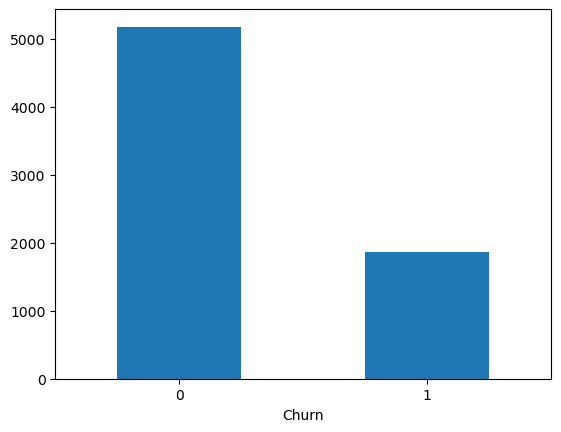

In [157]:
plot_bin(df_limpo, 'Churn', 'Churn')

Temos uma proporção de mais ou menos 26% de churn. Agora, vamos examinar como as outras variáveis categóricas se distribuem com relação ao churn:

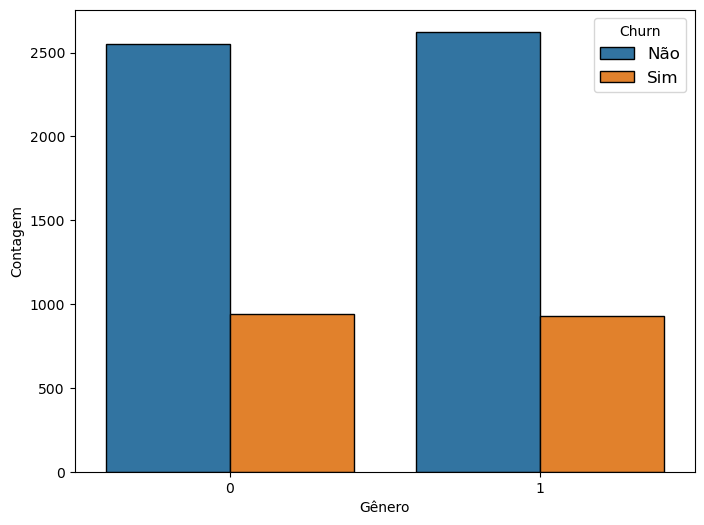

In [193]:
categorical_plot(data = df_limpo, x = 'customer.gender', xtitle = 'Gênero')

Não parece haver diferenças nas proporções tanto do total de homens(1) e mulheres(0), quanto na proporção de cada um com relação a taxa de churning.

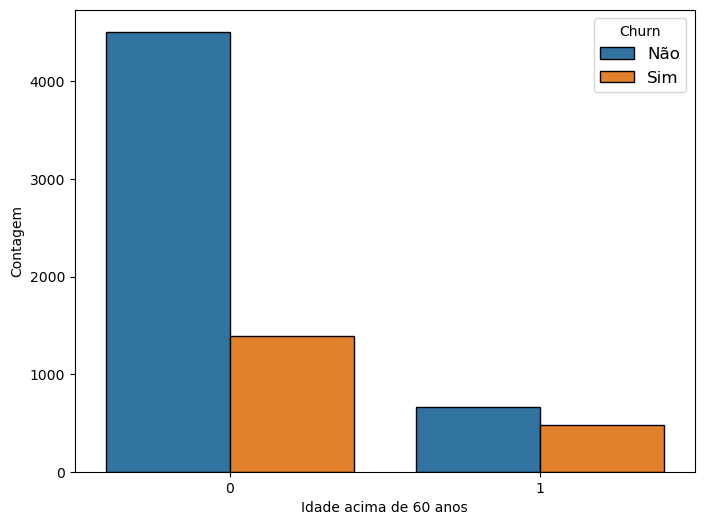

In [175]:
categorical_plot(data = df_limpo, x = 'customer.SeniorCitizen', xtitle = 'Idade acima de 60 anos')

Há uma representatividade muito mais baixa de idosos no banco de dados, porém também podemos notar que proporcionalmente há maior churning entre os idosos.

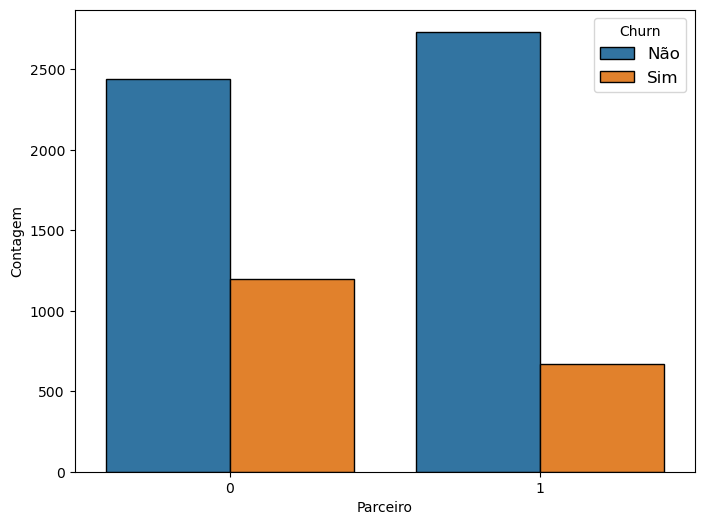

In [176]:
categorical_plot(data = df_limpo, x = 'customer.Partner', xtitle = 'Parceiro')

Há uma certa tendência de clientes sem parceiros a realizar churning.

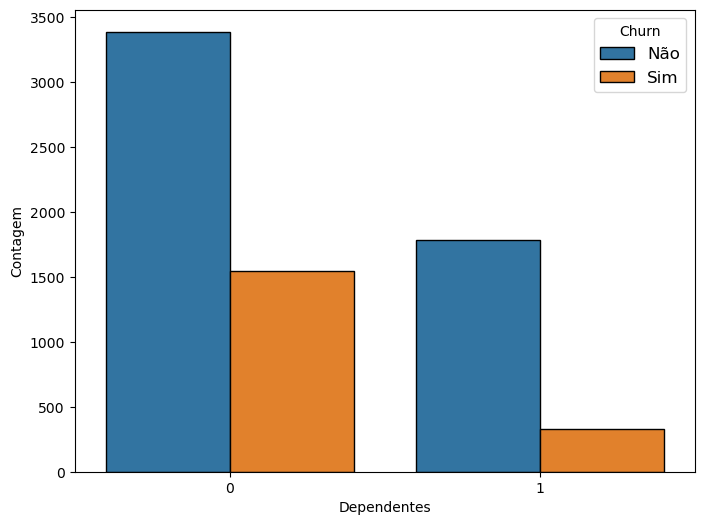

In [177]:
categorical_plot(data = df_limpo, x = 'customer.Dependents', xtitle = 'Dependentes')

Há também uma tendência dos clientes que não possuem dependentes de realizar maior churn.

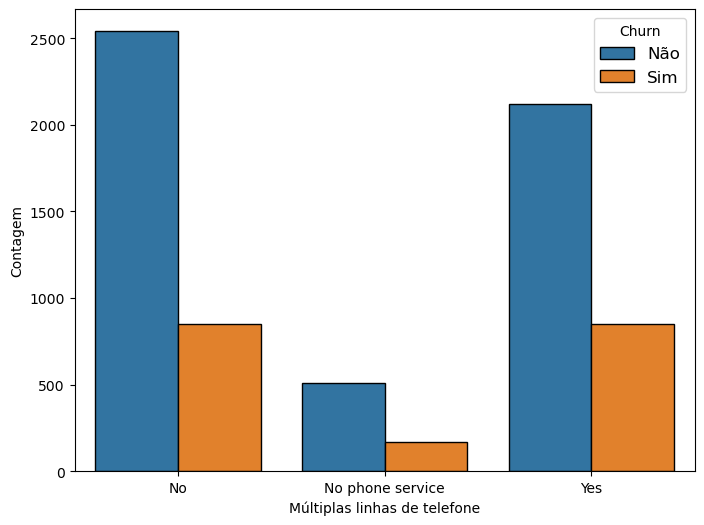

In [179]:
categorical_plot(data = df_limpo, x = 'phone.MultipleLines', xtitle = 'Múltiplas linhas de telefone')

Se separarmos os clientes que não possuem serviço de telefone daqueles que possuem uma ou múltiplas linhas, vemos que há uma proporção pequena daqueles que não possuem nenhuma linha; com relação ao churning não parece haver um padrão entre aqueles que possuem uma ou mais linhas.

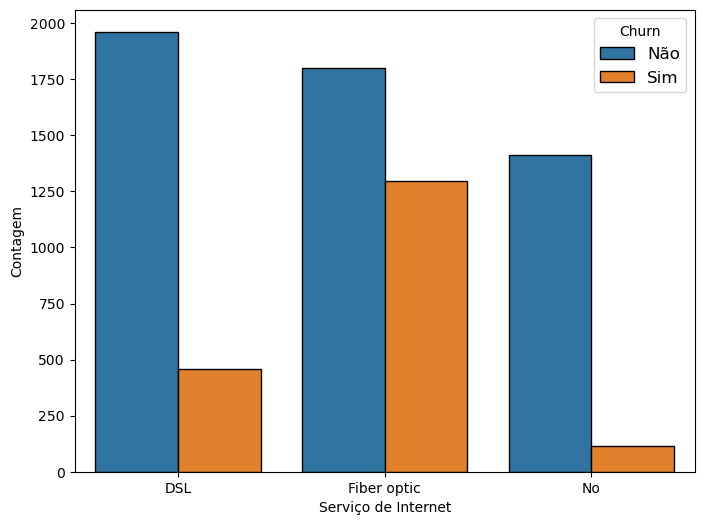

In [180]:
categorical_plot(data = df_limpo, x = 'internet.InternetService', xtitle = 'Serviço de Internet')

Quanto ao tipo de internet, notamos que há uma tendência muito alta dos clientes com fibra ótica de desistirem do serviço.

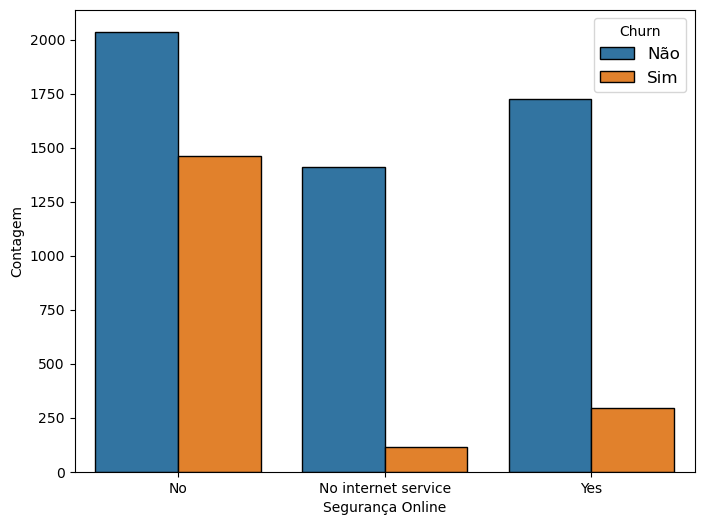

In [181]:
categorical_plot(data = df_limpo, x = 'internet.OnlineSecurity', xtitle = 'Segurança Online')

Também notamos uma tendência muito alta de churn em clientes que não posuem sistema de segurança online.

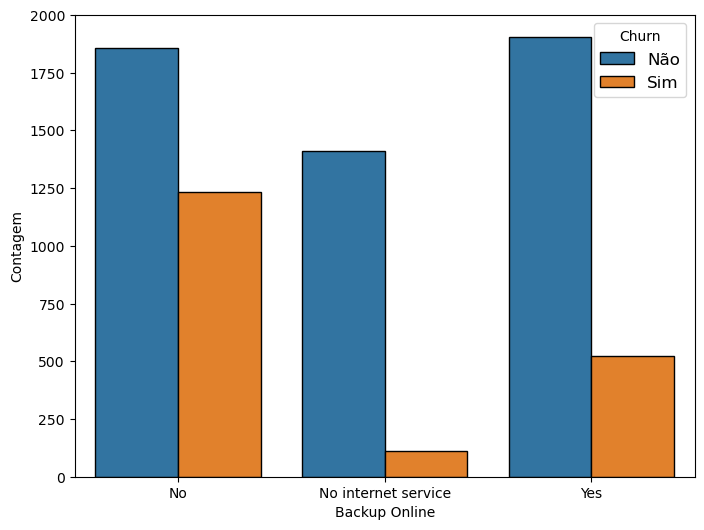

In [182]:
categorical_plot(data = df_limpo, x = 'internet.OnlineBackup', xtitle = 'Backup Online')

Assim como a mesma tendência se repete para aqueles clientes que não fazem uso do serviço de backup online.

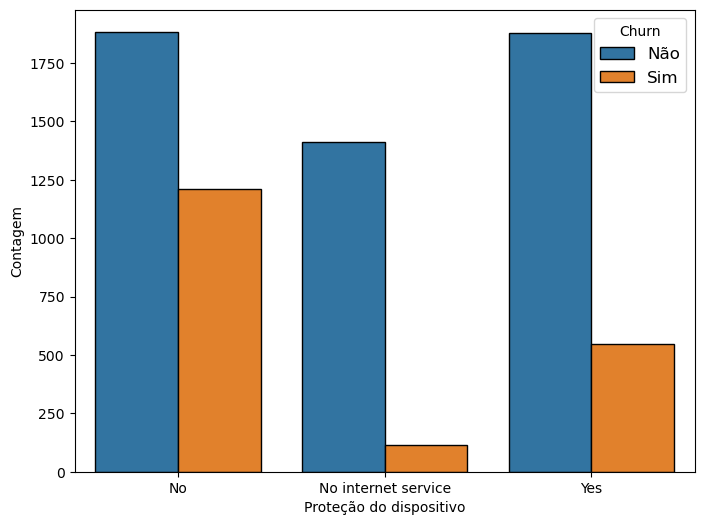

In [183]:
categorical_plot(data = df_limpo, x = 'internet.DeviceProtection', xtitle = 'Proteção do dispositivo')

Mais uma vez, também há maior tendência de churn para aqueles que não utilizam serviços de proteção do dispositivo.

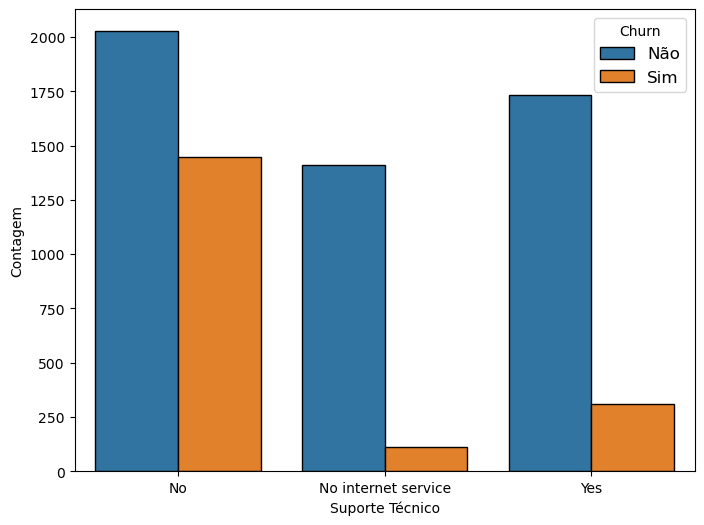

In [194]:
categorical_plot(data = df_limpo, x = 'internet.TechSupport', xtitle = 'Suporte Técnico')

Por fim, confirmando o perfil dos clientes que não optam por serviços de segurança e suporte, aquele que não utilizam suporte técnico também apresentam maior tendência de churning.

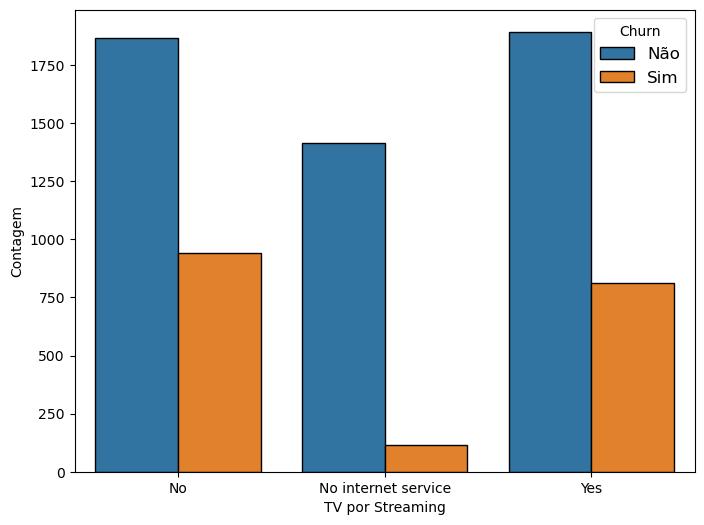

In [185]:
categorical_plot(data = df_limpo, x = 'internet.StreamingTV', xtitle = 'TV por Streaming')

O serviço de TV por streaming não parece influenciar muito o padrão de churning.

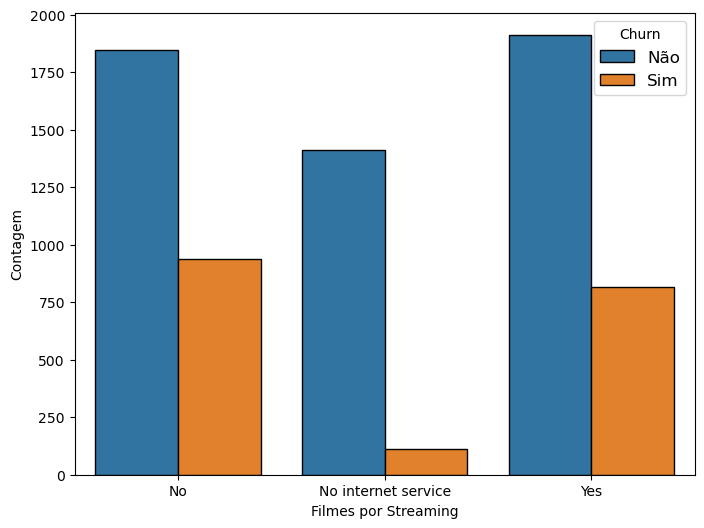

In [186]:
categorical_plot(data = df_limpo, x = 'internet.StreamingMovies', xtitle = 'Filmes por Streaming')

Assim como também a categoria de filmes por streaming.

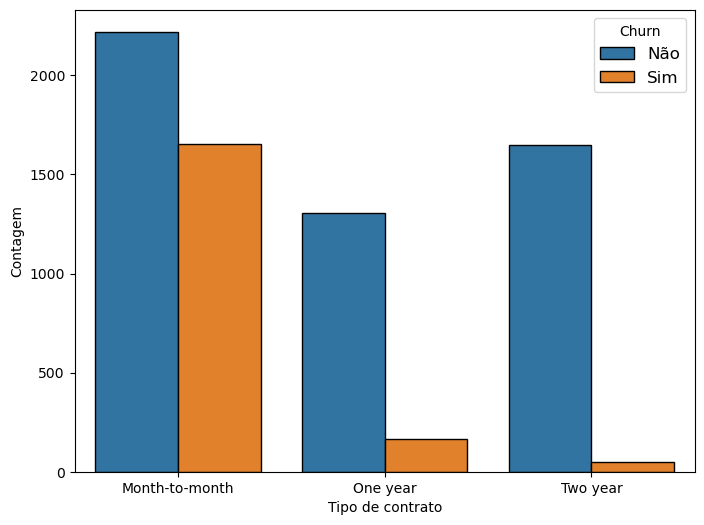

In [187]:
categorical_plot(data = df_limpo, x = 'account.Contract', xtitle = 'Tipo de contrato')

Notamos que o modelo de contrato mês-a-mês é campeão absoluto em churning, com relação aos modelos de um ou dois anos.

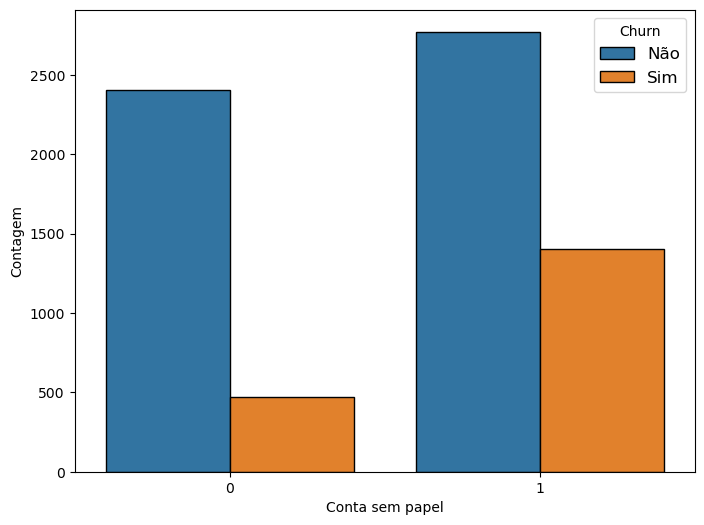

In [189]:
categorical_plot(data = df_limpo, x = 'account.PaperlessBilling', xtitle = 'Conta sem papel')

A conta "sem papel", ou seja, somente por meios eletrônicos também apresenta maior taxa de churning.

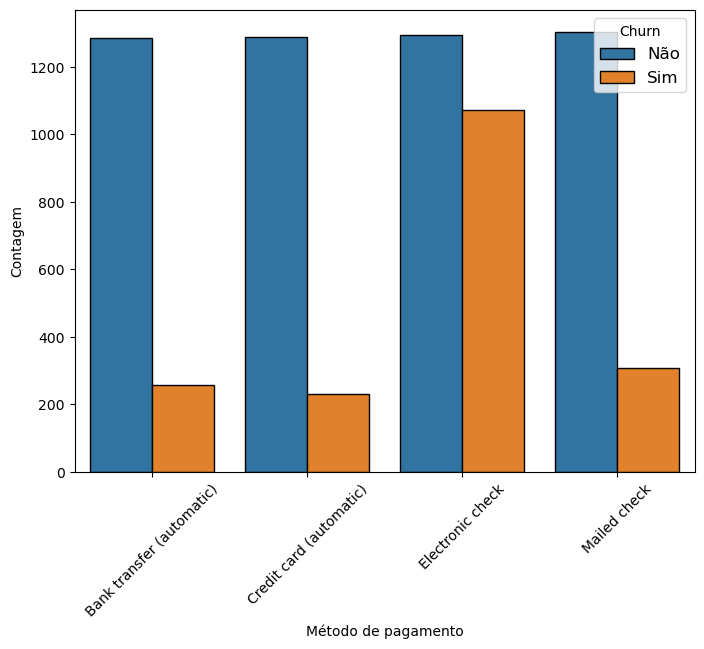

In [191]:
categorical_plot(data = df_limpo, x = 'account.PaymentMethod', xtitle = 'Método de pagamento', rotation = 45)

O método de pagamento através de cheque eletrônico também apresenta taxa bastante alta de churning.

Analisando as variáveis categóricas, o padrão que se desenha de cliente com maior taxa de churn é aquele que não possui parceiros ou dependentes e opta por serviços mais básicos de internet, sem suporte técnico e benfeitorias associadas. 

Se destaca também a relação entre modalidade do contrato, tipo de pagamento e conta: o maior churning é entre clientes que utilizam do contrato mês a mês, não recebem a conta em papel e pagam por meio de cheque eletrônico. Minha hipótese é que esse cancelamento maior pode ocorrer também por descuido desses clientes que não recebem a conta em papel todo mês e acabam por não pagar a conta a tempo, gerando eventuais multas e/ou débitos.

Por fim, quanto ao tipo de serviço oferecido pela empresa, fica claro que a proporção dos clientes que mais cancelam o serviço é aqueles que utilizam a fibra ótica. Isso pode indicar um problema grave na qualidade do serviço de fibra ótica, que pode estar longe do ideal e a precariedade do serviço leva ao cancelamento pelos clientes.

## Variáveis contínuas e correlações

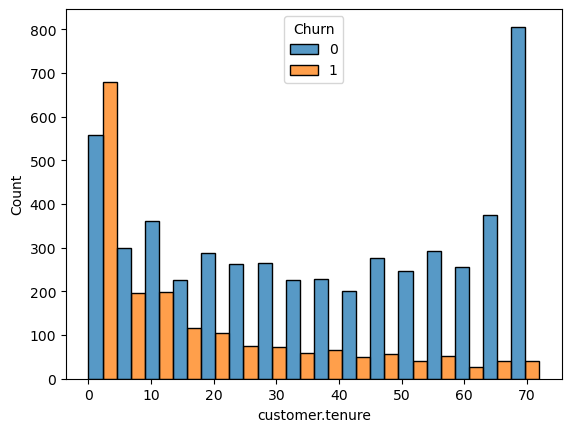

In [213]:
## Melhorar formatação do gráfico!!

sns.histplot(data = df_limpo, x = 'customer.tenure', hue = 'Churn', multiple = 'dodge')
plt.show()

Podemos notar que a retenção dos clientes é maior conforme o tempo em que eles assinam o serviço, com maior taxa de churning entre aqueles que com menor tempo de assinatura, e baixo churning com maior tempo de assinatura.

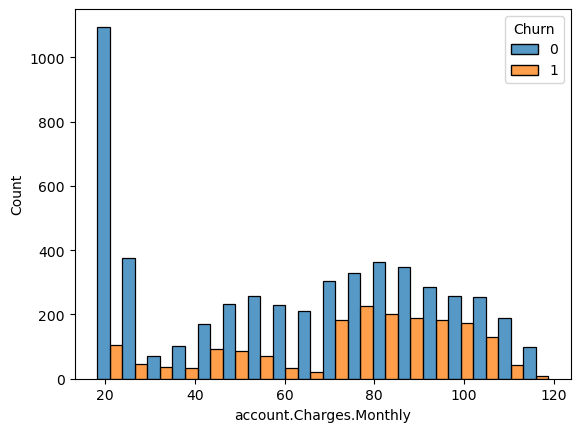

In [209]:
sns.histplot(data = df_limpo, x = 'account.Charges.Monthly', hue = 'Churn', multiple = 'dodge')
plt.show()

Aqui há um padrão interessante: aqueles que pagam pouco por mês tem uma retenção bastante alta, além de um número bastante expressivo de clientes no total.

<Axes: xlabel='account.Charges.Total', ylabel='Count'>

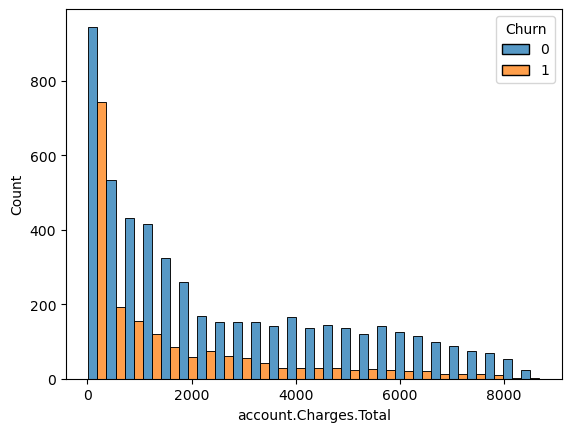

In [210]:
sns.histplot(data = df_limpo, x = 'account.Charges.Total', hue = 'Churn', multiple = 'dodge')

Porém, ao se multiplicar o gasto por mês com o total de tempo de assinatura, vemos novamente o padrão conforme o tempo de assinatura: o maior churning é entre os clientes que pagaram pouco no total devido ao menor tempo de assinatura.